In [1]:
import tensorflow as tf #导入tensorflow库
from tensorflow.examples.tutorials.mnist import input_data
import pylab 

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

W1105 10:40:17.255632 140445209999104 deprecation.py:323] From <ipython-input-2-a839aeb82f4b>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W1105 10:40:17.258269 140445209999104 deprecation.py:323] From /home/lx/.pyenv/versions/3.7.3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W1105 10:40:17.259493 140445209999104 deprecation.py:323] From /home/lx/.pyenv/versions/3.7.3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be 

Extracting MNIST_data/train-images-idx3-ubyte.gz


W1105 10:40:17.571536 140445209999104 deprecation.py:323] From /home/lx/.pyenv/versions/3.7.3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W1105 10:40:17.573313 140445209999104 deprecation.py:323] From /home/lx/.pyenv/versions/3.7.3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W1105 10:40:17.621803 140445209999104 deprecation.py:323] From /home/lx/.pyenv/versions/3.7.3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.p

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
tf.reset_default_graph()
# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data维度 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 数字=> 10 classes

# Set model weights
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.zeros([10]))

# 构建模型
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax分类

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))

#参数设置
learning_rate = 0.01
# 使用梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

training_epochs = 50
batch_size = 100
display_step = 1
saver = tf.train.Saver()
model_path = "log/521model.ckpt"

# 启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())# Initializing OP

    # 启动循环开始训练
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # 遍历全部数据集
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # 显示训练中的详细信息
        if (epoch+1) % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print( " Finished!")
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # 计算准确率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print ("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

    # Save model weights to disk
    save_path = saver.save(sess, model_path)
    print("Model saved in file: %s" % save_path)

Epoch: 0001 cost= 7.390992579
Epoch: 0002 cost= 4.080194721
Epoch: 0003 cost= 2.911412909
Epoch: 0004 cost= 2.346094584
Epoch: 0005 cost= 2.011213542
Epoch: 0006 cost= 1.788065773
Epoch: 0007 cost= 1.627304242
Epoch: 0008 cost= 1.505270493
Epoch: 0009 cost= 1.408934048
Epoch: 0010 cost= 1.330711152
Epoch: 0011 cost= 1.265683184
Epoch: 0012 cost= 1.210307669
Epoch: 0013 cost= 1.162564446
Epoch: 0014 cost= 1.121021852
Epoch: 0015 cost= 1.084430885
Epoch: 0016 cost= 1.051743873
Epoch: 0017 cost= 1.022449229
Epoch: 0018 cost= 0.995949117
Epoch: 0019 cost= 0.971837494
Epoch: 0020 cost= 0.949900228
Epoch: 0021 cost= 0.929683579
Epoch: 0022 cost= 0.911071400
Epoch: 0023 cost= 0.893768632
Epoch: 0024 cost= 0.877614774
Epoch: 0025 cost= 0.862656221
Epoch: 0026 cost= 0.848682164
Epoch: 0027 cost= 0.835574351
Epoch: 0028 cost= 0.823138518
Epoch: 0029 cost= 0.811510322
Epoch: 0030 cost= 0.800409609
Epoch: 0031 cost= 0.789943850
Epoch: 0032 cost= 0.780014633
Epoch: 0033 cost= 0.770662943
Epoch: 003

W1105 10:41:15.118470 140445209999104 deprecation.py:323] From /home/lx/.pyenv/versions/3.7.3/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


Starting 2nd session...
Accuracy: 0.8601
[6 2] [[4.7151822e-08 1.2697604e-10 2.2866340e-07 3.8553490e-11 3.1950250e-08
  7.2222548e-09 9.9999893e-01 2.8295498e-16 6.5535693e-07 1.8420375e-09]
 [4.8533830e-01 1.3497434e-05 5.0356477e-01 1.6690242e-03 3.9577390e-06
  8.6593125e-03 8.8484494e-06 2.0017769e-06 7.1507361e-04 2.5271538e-05]] [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


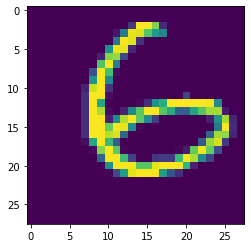

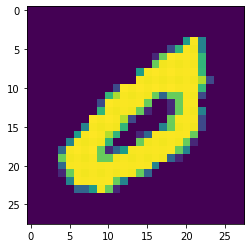

In [4]:
#读取模型
print("Starting 2nd session...")
with tf.Session() as sess:
    # Initialize variables
    sess.run(tf.global_variables_initializer())
    # Restore model weights from previously saved model
    saver.restore(sess, model_path)
    
     # 测试 model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # 计算准确率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print ("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
    
    output = tf.argmax(pred, 1)
    batch_xs, batch_ys = mnist.train.next_batch(2)
    outputval,predv = sess.run([output,pred], feed_dict={x: batch_xs})
    print(outputval,predv,batch_ys)

    im = batch_xs[0]
    im = im.reshape(-1,28)
    pylab.imshow(im)
    pylab.show()
    
    im = batch_xs[1]
    im = im.reshape(-1,28)
    pylab.imshow(im)
    pylab.show()